sustainability assessment of EU companies
from EU Survey questionnaire to Seaborn plot
statistical comparison of results

In [1]:
#import libraries
import pandas as pd
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from itertools import combinations

/home/nikolaholodkov/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/nikolaholodkov/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
#import file
df = pd.read_excel("xls/Content_Export_sustainability_test_20032023.xls")#import xls file (eusurvey format)
df

,Alias,sustainability_test,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Export Date,2023-03-20 12:44:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name of Company,Country,Sector,What steps are you taking to reduce your carbo...,How do you ensure that your products are envir...,How do you handle waste management in your com...,How do you ensure that your company is sociall...,How do you support the local community?,How do you promote diversity and inclusion wit...,How do you ensure that your company is economi...,How do you support the local economy?,How do you measure the economic impact of your...
3,Company1,Croatia,Retail,We have implemented energy-efficient practices...,We use sustainable materials in our products,We work with third-party companies to recycle ...,We have a code of conduct that outlines our so...,We provide job opportunities for members of th...,We provide diversity and inclusion training fo...,We do not have any measures in place for ensur...,We do not currently support the local economy ...,We do not currently measure the economic impac...
4,Company2,Netherlands,Retail,We have not yet taken any steps to reduce our ...,We do not currently have any measures in place...,We work with third-party companies to recycle ...,We do not have any measures in place for ensur...,We provide job opportunities for members of th...,We have implemented policies to ensure diversi...,We do not have any measures in place for ensur...,We source materials and services from local bu...,We use key performance indicators (KPIs) to tr...
...,...,...,...,...,...,...,...,...,...,...,...,...
298,Company296,Germany,Healthcare,We have not yet taken any steps to reduce our ...,We have implemented a recycling program for ou...,We have implemented a waste reduction program,We have implemented policies to ensure fair tr...,We provide job opportunities for members of th...,We do not currently have any measures in place...,We have implemented measures to reduce our ope...,We provide job opportunities for members of th...,We do not currently measure the economic impac...
299,Company297,Spain,Energy,We have implemented energy-efficient practices...,We use sustainable materials in our products,We have implemented a waste reduction program,We have implemented policies to ensure fair tr...,We do not currently support the local communit...,We do not currently have any measures in place...,We have implemented measures to reduce our ope...,We provide job opportunities for members of th...,We use key performance indicators (KPIs) to tr...
300,Company298,Cyprus,Retail,We have not yet taken any steps to reduce our ...,We use sustainable materials in our products,We work with third-party companies to recycle ...,We have implemented policies to ensure fair tr...,We do not currently support the local communit...,We do not currently have any measures in place...,We have diversified our revenue streams to red...,We source materials and services from local bu...,We do not currently measure the economic impac...
301,Company299,Bulgaria,Retail,We are currently working on developing renewab...,We do not currently have any measures in place...,We do not have any waste management measures i...,We have a code of conduct that outlines our so...,We provide job opportunities for members of th...,We have implemented policies to ensure diversi...,We have implemented measures to reduce our ope...,We provide job opportunities for members of th...,We regularly conduct economic impact assessmen...


In [3]:
#convert and clean file
df = pd.read_excel("xls/Content_Export_sustainability_test_20032023.xls")#import xls file (eusurvey format)
df.to_csv("csv/Content_Export_sustainability_test_20032023.csv", index=False)#convert xls file to csv
df = pd.read_csv('csv/Content_Export_sustainability_test_20032023.csv')#import csv file in vsc
df = df.iloc[2:]#remove unnecessary rows (first 2)
new_header = df.iloc[0] #grab the first row
df.columns = new_header #make the first row the df header
df = df[1:] #remove the redundant first row (now the header)
df

2,Name of Company,Country,Sector,What steps are you taking to reduce your carbon footprint?,How do you ensure that your products are environmentally sustainable?,How do you handle waste management in your company?,How do you ensure that your company is socially responsible?,How do you support the local community?,How do you promote diversity and inclusion within your company?,How do you ensure that your company is economically sustainable?,How do you support the local economy?,How do you measure the economic impact of your operations?
3,Company1,Croatia,Retail,We have implemented energy-efficient practices...,We use sustainable materials in our products,We work with third-party companies to recycle ...,We have a code of conduct that outlines our so...,We provide job opportunities for members of th...,We provide diversity and inclusion training fo...,We do not have any measures in place for ensur...,We do not currently support the local economy ...,We do not currently measure the economic impac...
4,Company2,Netherlands,Retail,We have not yet taken any steps to reduce our ...,We do not currently have any measures in place...,We work with third-party companies to recycle ...,We do not have any measures in place for ensur...,We provide job opportunities for members of th...,We have implemented policies to ensure diversi...,We do not have any measures in place for ensur...,We source materials and services from local bu...,We use key performance indicators (KPIs) to tr...
5,Company3,Greece,Energy,We have implemented energy-efficient practices...,We do not currently have any measures in place...,We do not have any waste management measures i...,We have implemented policies to ensure fair tr...,We provide job opportunities for members of th...,We have implemented policies to ensure diversi...,We have diversified our revenue streams to red...,We provide job opportunities for members of th...,We regularly conduct economic impact assessmen...
6,Company4,Ireland,Consumer goods,We are currently working on developing renewab...,We use sustainable materials in our products,We work with third-party companies to recycle ...,We do not have any measures in place for ensur...,We work with local organizations and charities...,We provide diversity and inclusion training fo...,We have implemented measures to reduce our ope...,We provide job opportunities for members of th...,We do not currently measure the economic impac...
7,Company5,Spain,Retail,We are currently working on developing renewab...,We use sustainable materials in our products,We do not have any waste management measures i...,We do not have any measures in place for ensur...,We provide job opportunities for members of th...,We do not currently have any measures in place...,We have implemented measures to reduce our ope...,We do not currently support the local economy ...,We do not currently measure the economic impac...
...,...,...,...,...,...,...,...,...,...,...,...,...
298,Company296,Germany,Healthcare,We have not yet taken any steps to reduce our ...,We have implemented a recycling program for ou...,We have implemented a waste reduction program,We have implemented policies to ensure fair tr...,We provide job opportunities for members of th...,We do not currently have any measures in place...,We have implemented measures to reduce our ope...,We provide job opportunities for members of th...,We do not currently measure the economic impac...
299,Company297,Spain,Energy,We have implemented energy-efficient practices...,We use sustainable materials in our products,We have implemented a waste reduction program,We have implemented policies to ensure fair tr...,We do not currently support the local communit...,We do not currently have any measures in place...,We have implemented measures to reduce our ope...,We provide job opportunities for members of th...,We use key performance indicators (KPIs) to tr...
300,Company298,Cyprus,Retail,We have not yet taken any steps to reduce our ...,We us

In [4]:
#define the function to convert the questionnaire answers into low to high sustainability values (0, 0.5, 1)
def categorise(row):  
    if row['What steps are you taking to reduce your carbon footprint?'] == "We have implemented energy-efficient practices and equipment":
        return 1
    elif row['What steps are you taking to reduce your carbon footprint?'] == "We are currently working on developing renewable energy sources":
        return 0.5
    elif row['What steps are you taking to reduce your carbon footprint?'] == "We have not yet taken any steps to reduce our carbon footprint":
        return 0
    elif row['How do you ensure that your products are environmentally sustainable?'] == "We use sustainable materials in our products":
        return 1
    elif row['How do you ensure that your products are environmentally sustainable?'] == "We have implemented a recycling program for our products":
        return 0.5
    elif row['How do you ensure that your products are environmentally sustainable?'] == "We do not currently have any measures in place for ensuring environmental sustainability of our products":
        return 0
    elif row['How do you handle waste management in your company?'] == "We have implemented a waste reduction program":
        return 1
    elif row['How do you handle waste management in your company?'] == "We work with third-party companies to recycle our waste":
        return 0.5
    elif row['How do you handle waste management in your company?'] == "We do not have any waste management measures in place":
        return 0
    elif row['How do you ensure that your company is socially responsible?'] == "We have a code of conduct that outlines our social responsibilities":
        return 1
    elif row['How do you ensure that your company is socially responsible?'] == "We have implemented policies to ensure fair treatment of our employees and stakeholders":
        return 0.5
    elif row['How do you ensure that your company is socially responsible?'] == "We do not have any measures in place for ensuring social responsibility":
        return 0
    elif row['How do you support the local community?'] == "We work with local organizations and charities to support community initiatives":
        return 1
    elif row['How do you support the local community?'] == "We provide job opportunities for members of the local community":
        return 0.5
    elif row['How do you support the local community?'] == "We do not currently support the local community in any way":
        return 0
    elif row['How do you promote diversity and inclusion within your company?'] == "We have implemented policies to ensure diversity and inclusion in our hiring practices":
        return 1
    elif row['How do you promote diversity and inclusion within your company?'] == "We provide diversity and inclusion training for our employees":
        return 0.5
    elif row['How do you promote diversity and inclusion within your company?'] == "We do not currently have any measures in place for promoting diversity and inclusion":
        return 0
    elif row['How do you ensure that your company is economically sustainable?'] == "We have implemented measures to reduce our operating costs":
        return 1
    elif row['How do you ensure that your company is economically sustainable?'] == "We have diversified our revenue streams to reduce our dependence on a single source of income":
        return 0.5
    elif row['How do you ensure that your company is economically sustainable?'] == "We do not have any measures in place for ensuring economic sustainability":
        return 0
    elif row['How do you support the local economy?'] == "We source materials and services from local businesses":
        return 1
    elif row['How do you support the local economy?'] == "We provide job opportunities for members of the local community":
        return 0.5
    elif row['How do you support the local economy?'] == "We do not currently support the local economy in any way":
        return 0
    elif row['How do you measure the economic impact of your operations?'] == "We regularly conduct economic impact assessments of our operations":
        return 1
    elif row['How do you measure the economic impact of your operations?'] == "We use key performance indicators (KPIs) to track the financial performance of our business":
        return 0.5
    elif row['How do you measure the economic impact of your operations?'] == "We do not currently measure the economic impact of our operations":
        return 0
    else:
        return None

In [5]:
#test and apply the function to every value of the dataframe column
df['What steps are you taking to reduce your carbon footprint?'] = df.apply(lambda row: categorise(row), axis=1)
df['How do you ensure that your products are environmentally sustainable?'] = df.apply(lambda row: categorise(row), axis=1)
df['How do you handle waste management in your company?'] = df.apply(lambda row: categorise(row), axis=1)
df['How do you ensure that your company is socially responsible?'] = df.apply(lambda row: categorise(row), axis=1)
df['How do you support the local community?'] = df.apply(lambda row: categorise(row), axis=1)
df['How do you promote diversity and inclusion within your company?'] = df.apply(lambda row: categorise(row), axis=1)
df['How do you ensure that your company is economically sustainable?'] = df.apply(lambda row: categorise(row), axis=1)
df['How do you support the local economy?'] = df.apply(lambda row: categorise(row), axis=1)
df['How do you measure the economic impact of your operations?'] = df.apply(lambda row: categorise(row), axis=1)

In [6]:
#measure the average values of the environmental, social, and economic questions: create environmental, social, and economical columns, 
#measure the environmental, social, and economical columns average: create overall column
df['Environmental'] = df[['What steps are you taking to reduce your carbon footprint?', 'How do you ensure that your products are environmentally sustainable?', 'How do you handle waste management in your company?']].mean(axis=1)
df['Social'] = df[['How do you ensure that your company is socially responsible?', 'How do you support the local community?', 'How do you promote diversity and inclusion within your company?']].mean(axis=1)
df['Economical'] = df[['How do you ensure that your company is economically sustainable?', 'How do you support the local economy?', 'How do you measure the economic impact of your operations?']].mean(axis=1)
df['Overall'] = df[['Environmental', 'Social', 'Economical']].mean(axis=1)
df.drop(df.columns[[3,4,5,6,7,8,9,10,11]], axis=1, inplace=True)#keep name, country, sector, environmental, social, economical, and overall columns, discard all other columns
df

2,Name of Company,Country,Sector,Environmental,Social,Economical,Overall
3,Company1,Croatia,Retail,0.833333,0.666667,0.000000,0.500000
4,Company2,Netherlands,Retail,0.166667,0.500000,0.500000,0.388889
5,Company3,Greece,Energy,0.333333,0.666667,0.666667,0.555556
6,Company4,Ireland,Consumer goods,0.666667,0.500000,0.500000,0.555556
7,Company5,Spain,Retail,0.500000,0.166667,0.333333,0.333333
...,...,...,...,...,...,...,...
298,Company296,Germany,Healthcare,0.500000,0.333333,0.500000,0.444444
299,Company297,Spain,Energy,1.000000,0.166667,0.666667,0.611111
300,Company298,Cyprus,Retail,0.500000,0.166667,0.500000,0.388889
301,Company299,Bulgaria,Retail,0.166667,0.833333,0.833333,0.611111


In [7]:
#unpivot the table using environmental, social, economical and overall columns 
df_melt = pd.melt(df, var_name=["Type of Sustainability"], value_name="Score", id_vars=["Name of Company", "Country", "Sector"])
df_melt

,Name of Company,Country,Sector,Type of Sustainability,Score
0,Company1,Croatia,Retail,Environmental,0.833333
1,Company2,Netherlands,Retail,Environmental,0.166667
2,Company3,Greece,Energy,Environmental,0.333333
3,Company4,Ireland,Consumer goods,Environmental,0.666667
4,Company5,Spain,Retail,Environmental,0.500000
...,...,...,...,...,...
1195,Company296,Germany,Healthcare,Overall,0.444444
1196,Company297,Spain,Energy,Overall,0.611111
1197,Company298,Cyprus,Retail,Overall,0.388889
1198,Company299,Bulgaria,Retail,Overall,0.611111


In [8]:
#group and count the distinct count of companies per country
df_companies_per_country = df_melt.groupby(['Country'])['Name of Company'].nunique().reset_index()
df_companies_per_country

,Country,Name of Company
0,Austria,14
1,Belgium,13
2,Bulgaria,7
3,Croatia,11
4,Cyprus,12
5,Czech Republic,12
6,Denmark,12
7,Estonia,10
8,Finland,8
9,France,10


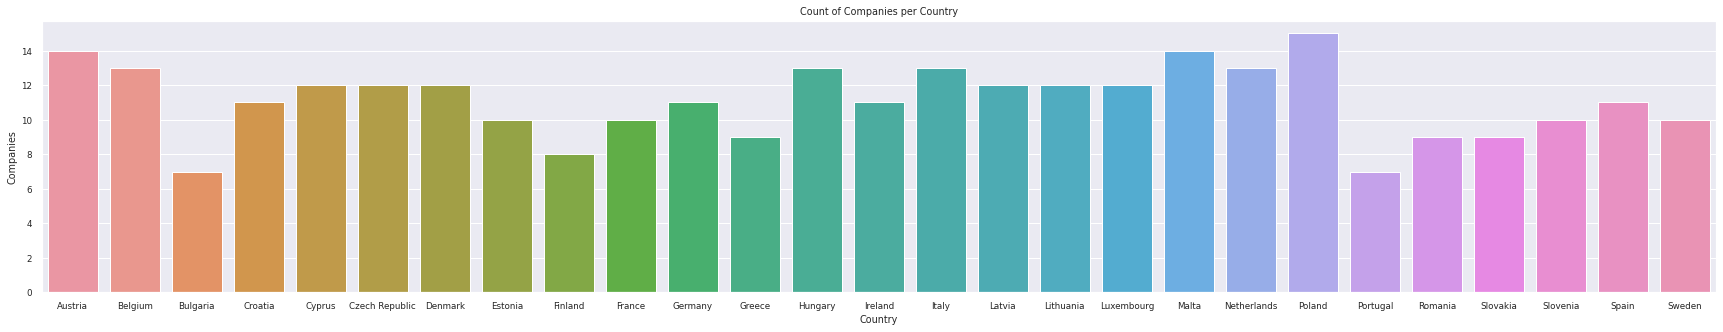

In [9]:
#plot the distinct count of companies per country
sns.set(font_scale=0.8)
plt.figure(figsize=(30,5))
df_companies_per_country_plot = sns.barplot(x='Country', y='Name of Company', data=df_companies_per_country).set(title="Count of Companies per Country", xlabel='Country', ylabel='Companies')

In [10]:
#create dataframe based on environmental, social, and economical columns
df_env_soc_eco = df_melt.loc[df_melt["Type of Sustainability"].isin(['Environmental','Social', "Economical"])]
df_env_soc_eco

,Name of Company,Country,Sector,Type of Sustainability,Score
0,Company1,Croatia,Retail,Environmental,0.833333
1,Company2,Netherlands,Retail,Environmental,0.166667
2,Company3,Greece,Energy,Environmental,0.333333
3,Company4,Ireland,Consumer goods,Environmental,0.666667
4,Company5,Spain,Retail,Environmental,0.500000
...,...,...,...,...,...
895,Company296,Germany,Healthcare,Economical,0.500000
896,Company297,Spain,Energy,Economical,0.666667
897,Company298,Cyprus,Retail,Economical,0.500000
898,Company299,Bulgaria,Retail,Economical,0.833333


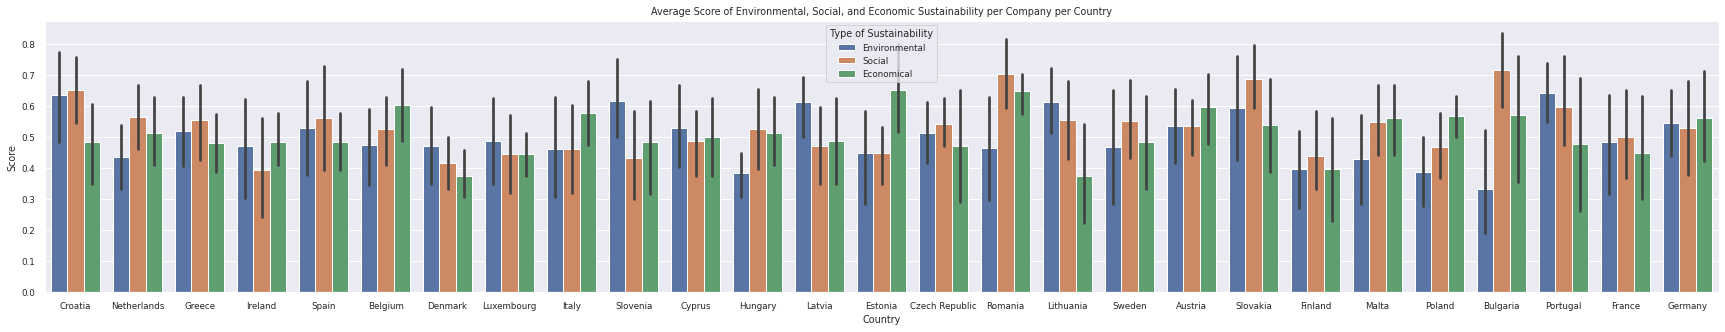

In [11]:
#plot the average score of environmental, social, and economical sustainability of companies per country
sns.set(font_scale=0.8)
plt.figure(figsize=(30,5))
df_env_soc_eco_plot = sns.barplot(x='Country', y='Score', hue="Type of Sustainability", data=df_env_soc_eco).set(title="Average Score of Environmental, Social, and Economic Sustainability per Company per Country", xlabel='Country', ylabel='Score')

In [12]:
#create dataframe based on the overall column
df_overall = df_melt.loc[df_melt["Type of Sustainability"].isin(["Overall"])]
df_overall

,Name of Company,Country,Sector,Type of Sustainability,Score
900,Company1,Croatia,Retail,Overall,0.500000
901,Company2,Netherlands,Retail,Overall,0.388889
902,Company3,Greece,Energy,Overall,0.555556
903,Company4,Ireland,Consumer goods,Overall,0.555556
904,Company5,Spain,Retail,Overall,0.333333
...,...,...,...,...,...
1195,Company296,Germany,Healthcare,Overall,0.444444
1196,Company297,Spain,Energy,Overall,0.611111
1197,Company298,Cyprus,Retail,Overall,0.388889
1198,Company299,Bulgaria,Retail,Overall,0.611111


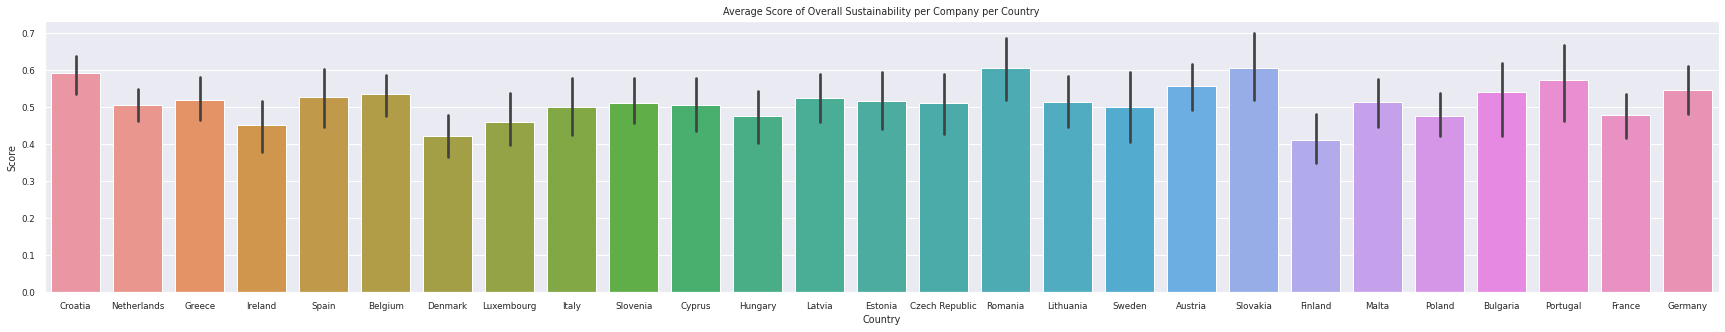

In [13]:
#plot the average score of the overall sustainability of companies per country
sns.set(font_scale=0.8)
plt.figure(figsize=(30,5))
df_overall_plot = sns.barplot(x='Country', y='Score', data=df_overall).set(title="Average Score of Overall Sustainability per Company per Country", xlabel='Country', ylabel='Score')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Finland vs. Croatia: Mann-Whitney-Wilcoxon test two-sided, P_val:2.131e-03 U_stat=6.500e+00
Croatia vs. Spain: Mann-Whitney-Wilcoxon test two-sided, P_val:3.194e-01 U_stat=7.600e+01
Finland vs. Spain: Mann-Whitney-Wilcoxon test two-sided, P_val:8.810e-02 U_stat=2.300e+01


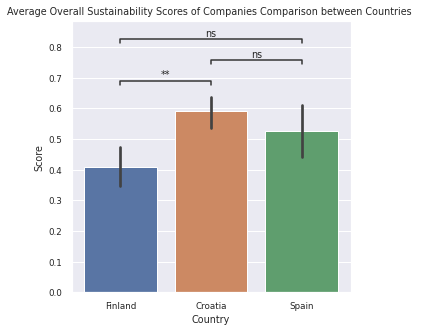

In [21]:
#measure the statistical difference (Mann-Whitney-Wilcoxon test two-sided) in overall sustainability between a sample of countries
countries =["Finland", "Croatia", "Spain"]#choose subset of countries
pairs = list(combinations(countries, r=2))#make comparison combinations
sns.set(font_scale=0.8)
plt.figure(figsize=(5,5))
plt.title("Average Overall Sustainability Scores of Companies Comparison between Countries ")
df_overall_plot_stats = sns.barplot(data=df_overall, x="Country", y="Score", order=countries)#plot results
annotator = Annotator(df_overall_plot_stats, pairs, data=df_overall,x="Country", y="Score", order=countries)
annotator.configure(test="Mann-Whitney")#measure statistical difference
annotator.apply_and_annotate()
plt.show()